<a href="https://colab.research.google.com/github/Karansaini260/Unified-mentor/blob/main/coffeesales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

### Load Data

In [2]:
df = pd.read_csv(r'/content/index.csv')
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


What i will analyse from this data set

1> Very First datetime and date column contains same date so i will remove date column and split it into, date and time .where i also describe months and days so sales details become more understandable in a part of presentation.

2> There are two columns cash and card means only one time one side transaction. In Both payment platform case i should make another column bothpayment.

3> Correlation with coffeename and time column in which we will  see coffeesale is high or low in a different times.

4> mode of payment customer prefer ,I don't think card column make any sense, but if we want to know how many time single customer do transaction and which item it makes alot of sense and what time he/she prefer.


In [3]:
df.shape

(1133, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [5]:
df.nunique()

,0
date,150
datetime,1133
cash_type,2
card,446
money,16
coffee_name,8


In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.dtypes

,0
date,object
datetime,datetime64[ns]
cash_type,object
card,object
money,float64
coffee_name,object


In [7]:
df[df['card'].isnull()]['cash_type'].value_counts()

,count
cash_type,
cash,89


In [8]:
df['cash_type'].value_counts(normalize=True)

,proportion
cash_type,
card,0.921447
cash,0.078553


In [9]:
pd.DataFrame(df['coffee_name'].value_counts(normalize=True).sort_values(ascending=False).round(4)*100)

,proportion
coffee_name,
Americano with Milk,23.65
Latte,21.45
Cappuccino,17.30
Americano,14.92
Cortado,8.74
Hot Chocolate,6.53
Espresso,4.32
Cocoa,3.09


In [10]:
df['date']=pd.to_datetime(df['date'])
df['datetime']=pd.to_datetime(df['datetime'])
 #Create column of Month, Weekdays, and Hours
df['month']=df['date'].dt.strftime('%Y-%m')
df['day']=df['date'].dt.strftime('%w')
df['hour']=df['datetime'].dt.strftime('%H')


In [11]:
# df.drop('datetime',inplace=True,axis=1)

In [12]:
df

,date,datetime,cash_type,card,money,coffee_name,month,day,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,2024-03,5,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,2024-03,5,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,2024-03,5,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,2024-03,5,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,2024-03,5,13
...,...,...,...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado,2024-07,3,20
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk,2024-07,3,20
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte,2024-07,3,21
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte,2024-07,3,21


In [13]:
# EDA part

In [14]:
[df['date'].min(),df['date'].max()]

[Timestamp('2024-03-01 00:00:00'), Timestamp('2024-07-31 00:00:00')]

In [15]:
revenue_data= df.groupby(['coffee_name']).sum(['money']).reset_index().sort_values(by='money',ascending=False)

Text(0.5, 0, 'Revenue')

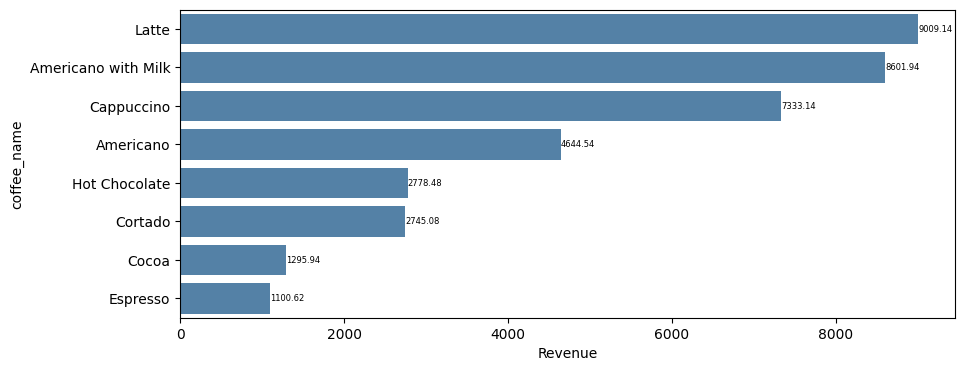

In [16]:
plt.figure(figsize=(10,4))
ax= sns.barplot(data=revenue_data,x='money',y='coffee_name',color='steelblue')
ax.bar_label(ax.containers[0], fontsize=6)
plt.xlabel('Revenue')

In [17]:
monthly_sales = df.groupby(['coffee_name',
                            'month']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='month'
                            ,columns='coffee_name',values='count').reset_index()
monthly_sales

coffee_name,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03,36,34,20,6,30,10,22,48
1,2024-04,35,42,43,6,19,7,13,31
2,2024-05,48,58,55,9,17,8,14,58
3,2024-06,14,69,46,5,19,10,14,50
4,2024-07,36,65,32,9,14,14,11,56


In [18]:
monthly_sales.describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,14.0,48.0
Americano with Milk,34.0,69.0
Cappuccino,20.0,55.0
Cocoa,5.0,9.0
Cortado,14.0,30.0
Espresso,7.0,14.0
Hot Chocolate,11.0,22.0
Latte,31.0,58.0


([<matplotlib.axis.XTick at 0x798811362060>,
 [Text(0, 0, '2024-03'),
  Text(1, 0, '2024-04'),
  Text(2, 0, '2024-05'),
  Text(3, 0, '2024-06'),
  Text(4, 0, '2024-07')])

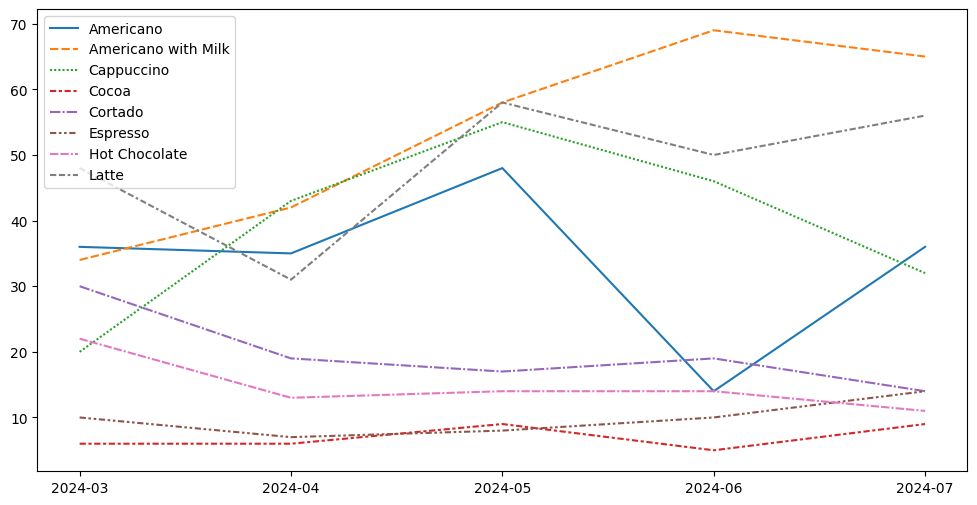

In [19]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales)
plt.legend()
plt.xticks(range(len(monthly_sales['month'])),monthly_sales['month'])


In [20]:
weekday_sales = df.groupby(['day']).count()['date'].reset_index().rename(columns={'date':'count'})
weekday_sales

,day,count
0,0,151
1,1,151
2,2,185
3,3,165
4,4,164
5,5,163
6,6,154


([<matplotlib.axis.XTick at 0x79880e4b8bc0>,
 [Text(0, 0, 'Sun'),
  Text(1, 0, 'Mon'),
  Text(2, 0, 'Tue'),
  Text(3, 0, 'Wed'),
  Text(4, 0, 'Thur'),
  Text(5, 0, 'Fri'),
  Text(6, 0, 'Sat')])

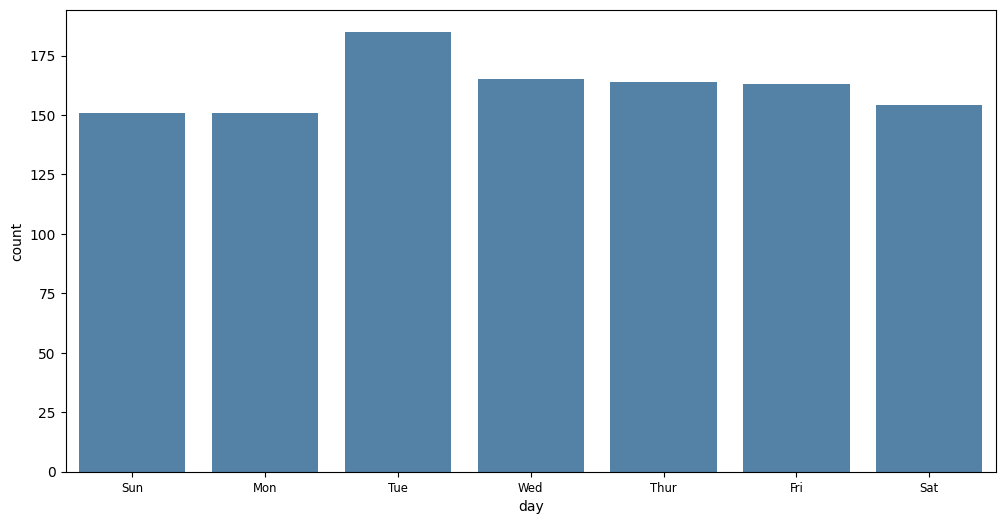

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(data=weekday_sales,x='day',y='count',color='steelblue')
plt.xticks(range(len(weekday_sales['day'])),['Sun','Mon','Tue',
'Wed','Thur','Fri','Sat'],size='small')

In [22]:
daily_sales = df.groupby(['coffee_name',
                                   'date']).count()['datetime'].reset_index().rename(columns={
                                       'datetime':'count'}).pivot(index='date'
                                       ,columns='coffee_name',values='count').reset_index().fillna(0)
daily_sales

coffee_name,date,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03-01,1.0,4.0,0.0,1.0,0.0,0.0,3.0,2.0
1,2024-03-02,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2024-03-03,1.0,2.0,0.0,1.0,2.0,0.0,2.0,2.0
3,2024-03-04,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
4,2024-03-05,0.0,0.0,0.0,1.0,1.0,0.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...
145,2024-07-27,0.0,5.0,4.0,0.0,0.0,2.0,0.0,2.0
146,2024-07-28,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
147,2024-07-29,3.0,2.0,2.0,1.0,0.0,0.0,2.0,1.0
148,2024-07-30,2.0,12.0,2.0,0.0,3.0,2.0,0.0,3.0


In [23]:
hourly_sales= df.groupby(['hour']).count()['date'].reset_index().rename(columns={'date':'count'})
hourly_sales

,hour,count
0,07,13
1,08,44
2,09,50
3,10,133
4,11,103
5,12,87
6,13,78
7,14,76
8,15,65
9,16,77


<Axes: xlabel='hour', ylabel='count'>

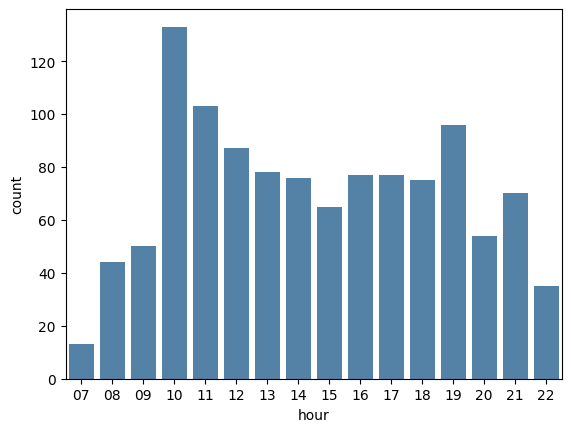

In [24]:
sns.barplot(data=hourly_sales,x='hour',y='count',color='steelblue')

In [25]:
hourly_sales_by_coffee= df.groupby(['hour','coffee_name']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='hour',
 columns='coffee_name',values='count').fillna(0).reset_index()
hourly_sales_by_coffee

coffee_name,hour,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,07,5.0,4.0,1.0,0.0,1.0,0.0,0.0,2.0
1,08,10.0,7.0,8.0,1.0,6.0,0.0,0.0,12.0
2,09,8.0,16.0,6.0,1.0,5.0,3.0,0.0,11.0
3,10,20.0,31.0,10.0,4.0,8.0,2.0,7.0,51.0
4,11,21.0,25.0,16.0,1.0,13.0,6.0,8.0,13.0
5,12,14.0,26.0,15.0,3.0,7.0,6.0,3.0,13.0
6,13,18.0,18.0,10.0,2.0,12.0,3.0,4.0,11.0
7,14,15.0,18.0,13.0,4.0,6.0,5.0,2.0,13.0
8,15,14.0,15.0,8.0,0.0,3.0,4.0,6.0,15.0
9,16,10.0,18.0,12.0,3.0,12.0,5.0,4.0,13.0


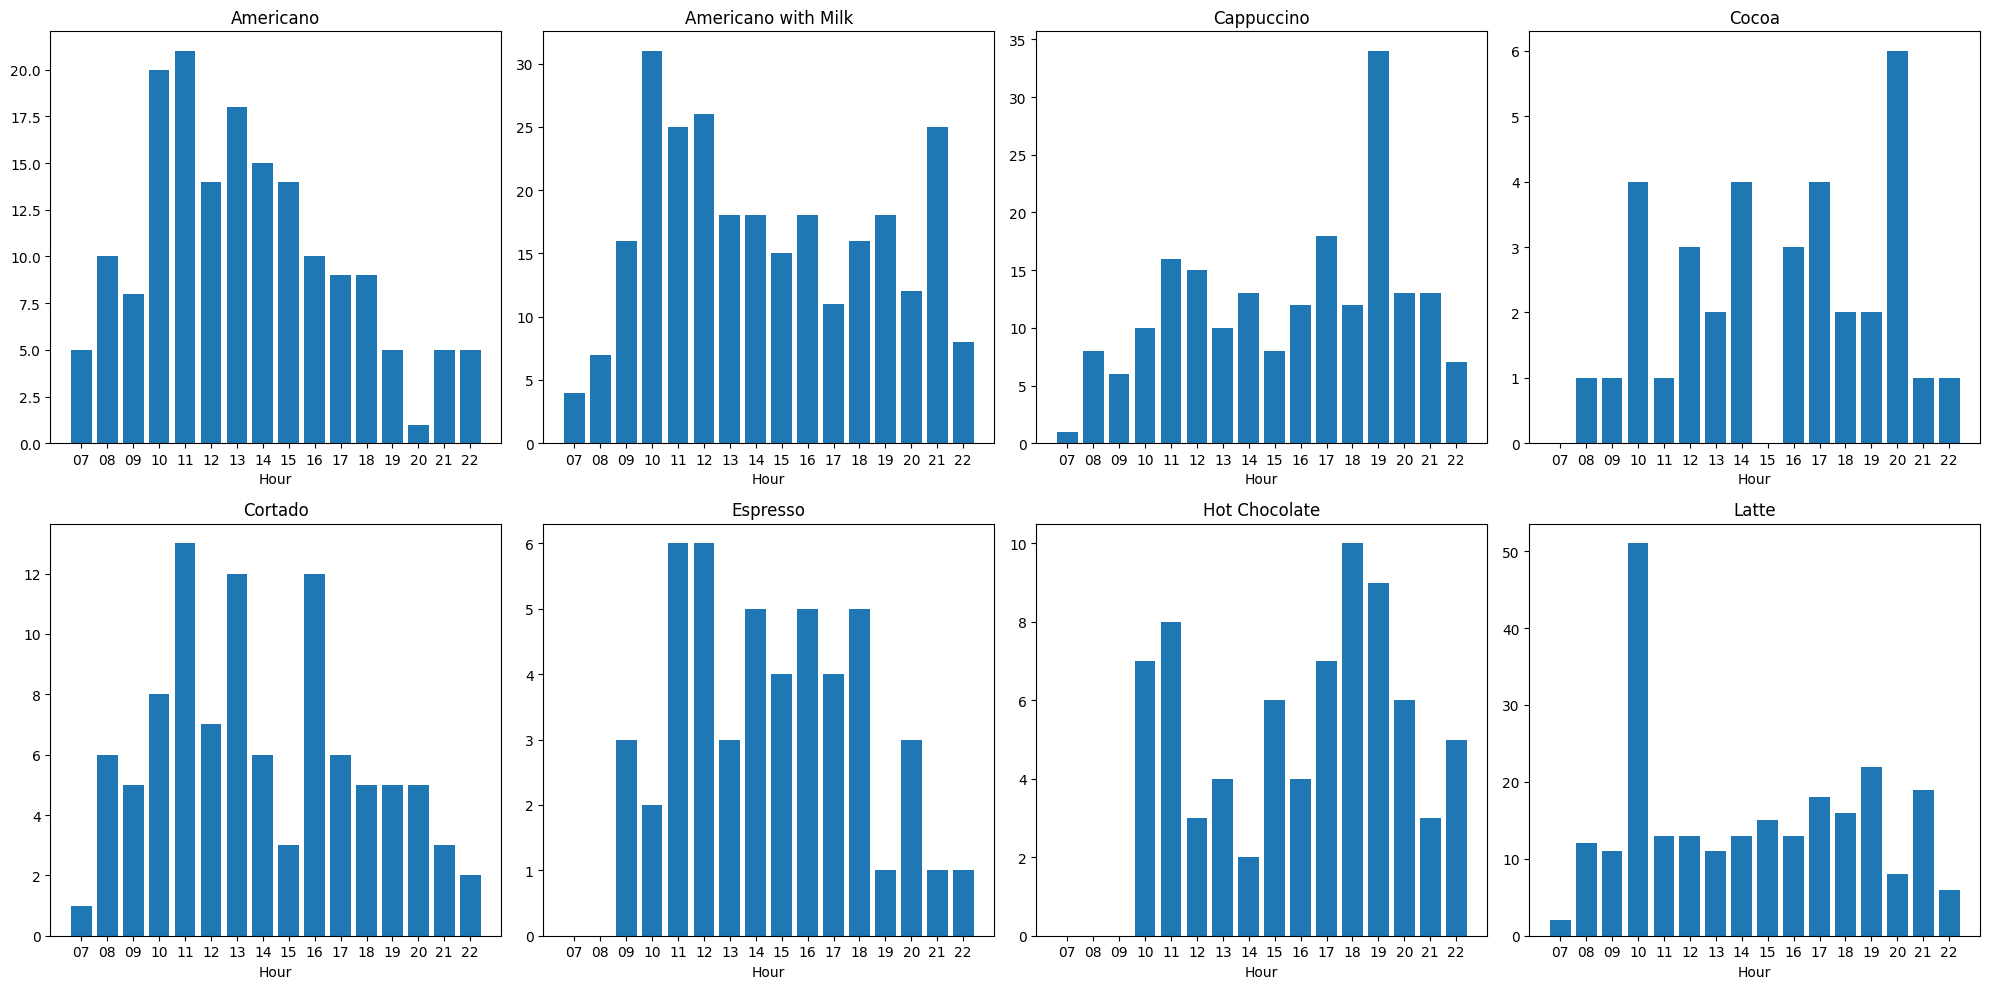

In [26]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
 # Flatten the array of subplots for easy iteration
axs = axs.flatten()
# Loop through each column in the DataFrame, skipping the 'Index' column
for i, column in enumerate(hourly_sales_by_coffee.columns[1:]):
  # Skip the first column ('Index')
  axs[i].bar(hourly_sales_by_coffee['hour'],
  hourly_sales_by_coffee[column])
  axs[i].set_title(f'{column}')
  axs[i].set_xlabel('Hour')
 #axs[i].set_ylabel('Sales')
  plt.tight_layout()
 # Show the plot
plt.show()


### Feature Engineering

In [27]:
# Create date, time, month, day, and hour columns from datetime
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time
df['month'] = df['datetime'].dt.month_name()
df['day'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

# Create a column for 'bothpayment' based on 'cash_type'
df['bothpayment'] = df['cash_type'].apply(lambda x: 1 if x == 'card' else 0)

display(df.head())

,date,datetime,cash_type,card,money,coffee_name,month,day,hour,time,bothpayment
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,March,Friday,10,10:15:50.520000,1
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,March,Friday,12,12:19:22.539000,1
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,March,Friday,12,12:20:18.089000,1
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,March,Friday,13,13:46:33.006000,1
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,March,Friday,13,13:48:14.626000,1


# Task
Perform feature engineering, build and train models, and evaluate their performance.

## Data preparation

### Subtask:
Prepare the data for modeling, including handling categorical variables and splitting the data into training and testing sets.


**Reasoning**:
Dropping unnecessary columns, converting categorical features, creating dummy variables, defining features and target, and splitting the data into training and testing sets.



In [28]:
# Drop original columns
df = df.drop(['date', 'datetime', 'card', 'time'], axis=1)
# Convert columns to categorical type
df['month'] = df['month'].astype('category')
df['day'] = df['day'].astype('category')
df['hour'] = df['hour'].astype('category')
# Create dummy variables
df_dummies = pd.get_dummies(df, columns=['cash_type', 'coffee_name', 'month', 'day', 'hour'], drop_first=True)
# Define features (X) and target (y)
X = df_dummies.drop('money', axis=1)
y = df_dummies['money']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.head())
display(y_train.head())

,bothpayment,cash_type_cash,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte,month_July,...,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22
12,0,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
381,1,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
717,1,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
497,1,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
964,1,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


,money
12,40.00
381,37.72
717,32.82
497,37.72
964,32.82


## Model selection

### Subtask:
Choose appropriate models for the task.


**Reasoning**:
Choose two regression models for the task.



In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## Model training

### Subtask:
Train the selected models using the training data.


**Reasoning**:
Instantiate and train the Linear Regression and Random Forest Regressor models.



In [30]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model evaluation

### Subtask:
Evaluate the performance of the trained models using the testing data.


**Reasoning**:
Evaluate the performance of the trained models using the testing data by making predictions and calculating MSE and R2 scores.



In [31]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)

# Calculate MSE for both models
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate R2 score for both models
r2_linear = r2_score(y_test, y_pred_linear)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print(f'Linear Regression MSE: {mse_linear:.4f}')
print(f'Linear Regression R2: {r2_linear:.4f}')
print(f'Random Forest MSE: {mse_rf:.4f}')
print(f'Random Forest R2: {r2_rf:.4f}')

Linear Regression MSE: 0.7946
Linear Regression R2: 0.9573
Random Forest MSE: 0.6135
Random Forest R2: 0.9670


## Summary:

### Data Analysis Key Findings
*   The original date, datetime, card, and time columns were dropped.
*   Categorical features including cash\_type, coffee\_name, month, day, and hour were one-hot encoded.
*   The data was split into training and testing sets (80/20 split).
*   Two regression models, Linear Regression and Random Forest Regressor, were selected and trained.
*   The Linear Regression model achieved a Mean Squared Error (MSE) of 0.7946 and an R-squared (\R^2$) of 0.9573 on the test set.
*   The Random Forest model achieved a Mean Squared Error (MSE) of 0.6135 and an R-squared R^2 of 0.9670 on the test set.

### Insights or Next Steps
*   Based on the evaluation metrics, the Random Forest model performed slightly better than the Linear Regression model on this dataset.
*   Further hyperparameter tuning could be performed on the Random Forest model to potentially improve its performance.
